#  Tutorial 8: SBM and DC-SBM

 <font color='magneta'> In this tutorial, we will implement various inference techniques and models to solve the SBM on real networks. We will use several codes developed in the package pysbm. </font>

# Exercise 1

### Exercise 1.a

* Clone the github repository pysbm at https://github.com/funket/pysbm.

### Exercise 1.b

* Download the datasets of American College football *(football)*, Zachary’s karate club *(karate)* and Political blogs *(polblogs)* from http://www-personal.umich.edu/~mejn/netdata/ and put them inside the folder pysbm/Network Data/.

Now, we need to import the `pysbm` package and the `networkx` package, 
which is the used package for representing the networks. 
Additionally, we want to handle ```numpy``` structures and create some plots with `matplotlib`. 

If you later want to process larger graphs, we recommend using [PyPy](https://pypy.org). 


In [4]:
# Import libraries
import pysbm
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

In [5]:
dataset = {'karate':'./pysbm/Network Data/karate/karate.gml',
           'football':'./pysbm/Network Data/football/football.gml',
           'polblogs':'./pysbm/Network Data/polblogs/polblogs.gml'}

In [6]:
colors = {0:'b',1:'r',2:'g',3:'orange',4:'black',5:'magenta'}

We start with one of the standard examples, the karate club network.

* Import dataset into a `networkx` network object. Make it `undirected` as we are interested in studying, for simplicity, only this version.   
Keep only the largest connected component.

In [7]:
?nx.read_gml

In [8]:
# Step 1: import the dataset karate_club
graph = nx.read_gml(dataset['karate'], label='id')

In [9]:
graph = graph.to_undirected()

In [10]:
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
graph = graph.subgraph(Gcc[0])


In [11]:
print(graph.number_of_nodes())

34


In [12]:
print(graph.number_of_edges())

78


**Goal**: replicate the example of Karrer and Newmann 2011 
(https://journals.aps.org/pre/pdf/10.1103/PhysRevE.83.016107)

Let's infer stochastic block models for the karate club graph with the standard  SBM. First, we need the graph and encapsulate the graph into a `partition` object with the known number of blocks.

In [13]:
K = 2
standard_partition = pysbm.NxPartition(graph=graph, number_of_blocks=K)
standard_objective_function = pysbm.TraditionalUnnormalizedLogLikelyhood(is_directed=False)

Now we take a look at the current state and plot the nodes with size proportional to their degree and with color equivalent to the group they belong to.

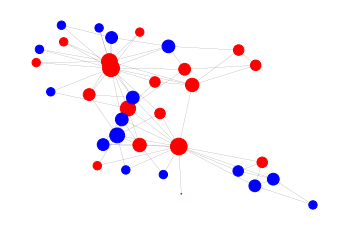

In [14]:
node_size = [np.log(graph.degree[i])*100+0.5 for i in list(graph.nodes())]
position = nx.spring_layout(graph, iterations=100)

plt.figure()
nx.draw_networkx_nodes(graph, position, node_size=node_size,
                      node_color=[colors[standard_partition.get_block_of_node(node)] for node in graph])
nx.draw_networkx_edges(graph, pos=position, width=0.1)
plt.axis('off')
plt.show()

### Exercise 1.c

We now run 3 different inference methods:
   * `KarrerInference`: the greedy with MC moves proposed by Karrer & Newman to find the maximum of the objective function.
   * `MetropolisHastingInference`: a Metropolis Hasting MC scheme similar to Karrer & Newman but where there is an acceptance rate to a move. The Karrer & Newman instead, makes deterministic moves that always improve the objective function. 
   * `PeixotoInference`: a Metropolis Hasting MC scheme wich aggregates blocks, in addition to switching single nodes' groups. This is similar to `MetropolisHastingInference` but in addition merges blocks while performing moves.

All the three methods will end up in a local minimum of the objective function. Therefore we run the inference 10 times and keep the partition associated to the best value of the objective function.

### **Inference 1**: `KarrerInference`

In [18]:
N_real=100
best_objective=-1000000
best_partition_standard=None
for r in range(N_real):
    standard_partition = pysbm.NxPartition(graph=graph, number_of_blocks=K)
    standard_inference = pysbm.KarrerInference(graph, standard_objective_function, standard_partition)
    standard_inference.infer_stochastic_block_model()
    L = standard_objective_function.calculate(standard_partition)
    if L > best_objective:
        best_objective = L 
        best_partition_standard = standard_partition
    print(r, L, best_objective)

0 -233.52608348059132 -233.52608348059132
1 -233.5260834805913 -233.5260834805913
2 -239.4521718457837 -233.5260834805913
3 -233.5260834805913 -233.5260834805913
4 -244.55814672221362 -233.5260834805913
5 -239.45217184578374 -233.5260834805913
6 -239.4521718457837 -233.5260834805913
7 -233.52608348059132 -233.5260834805913
8 -233.5260834805913 -233.5260834805913
9 -244.7413377895341 -233.5260834805913
10 -241.2276636342584 -233.5260834805913
11 -233.5260834805913 -233.5260834805913
12 -253.813725222306 -233.5260834805913
13 -239.45217184578374 -233.5260834805913
14 -233.52608348059132 -233.5260834805913
15 -233.5260834805913 -233.5260834805913
16 -233.52608348059132 -233.5260834805913
17 -239.4521718457837 -233.5260834805913
18 -233.5260834805913 -233.5260834805913
19 -233.5260834805913 -233.5260834805913
20 -239.45217184578374 -233.5260834805913
21 -245.2788552328234 -233.5260834805913
22 -245.2788552328234 -233.5260834805913
23 -239.45217184578374 -233.5260834805913
24 -233.526083480

### **Inference 1b**: `KarrerInference` with no negative moves allowed.

In [23]:
N_real=10
best_objective=-1000000
best_partition_standard_nn=None
for r in range(N_real):
    # Your code here 

0 -257.91323395712465 -257.91323395712465
1 -260.24199903412125 -257.91323395712465
2 -297.9643235418555 -257.91323395712465
3 -246.22858253925915 -246.22858253925915
4 -240.9139936862718 -240.9139936862718
5 -273.1068728322131 -240.9139936862718
6 -238.58546355646743 -238.58546355646743
7 -296.6741220168004 -238.58546355646743
8 -257.17582121703515 -238.58546355646743
9 -271.8847471614158 -238.58546355646743


### **Inference 2**: `MetropolisHastingInference` 

In [19]:
N_real=10
best_objective=-1000000
best_partition_standard_MH=None
for r in range(N_real):
    # Your code here 

0 -233.5260834805913 -233.5260834805913
1 -233.52608348059132 -233.5260834805913
2 -233.52608348059132 -233.5260834805913
3 -246.6868691470202 -233.5260834805913
4 -233.5260834805913 -233.5260834805913
5 -233.52608348059132 -233.5260834805913
6 -233.52608348059132 -233.5260834805913
7 -233.52608348059132 -233.5260834805913
8 -233.5260834805913 -233.5260834805913
9 -233.5260834805913 -233.5260834805913


### **Inference 3**: `PeixotoInference` 

In [20]:
N_real=10
best_objective=-1000000
best_partition_standard_Peixoto=None
for r in range(N_real):
    # Your code here 

0 -233.52608348059132 -233.52608348059132
1 -239.4521718457837 -233.52608348059132
2 -233.5260834805913 -233.5260834805913
3 -233.52608348059132 -233.5260834805913
4 -267.64568306550115 -233.5260834805913
5 -233.52608348059132 -233.5260834805913
6 -233.52608348059132 -233.5260834805913
7 -233.52608348059132 -233.5260834805913
8 -233.52608348059132 -233.5260834805913
9 -233.52608348059132 -233.5260834805913


#### Plots the results

In [21]:
def node_colors(colors, partition, graph):
    node_colors = [colors[partition.get_block_of_node(node)] for node in graph]
    
    return node_colors

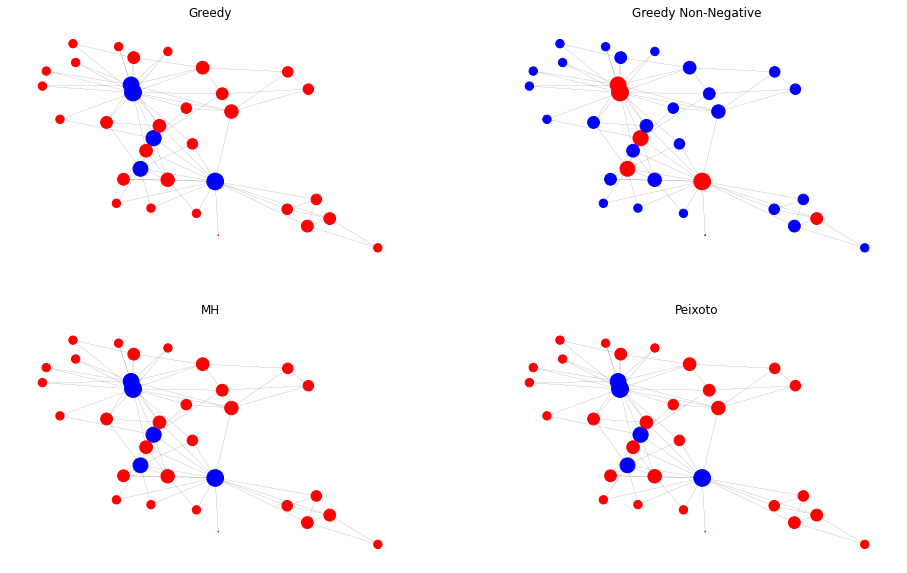

In [24]:
models = [best_partition_standard, best_partition_standard_nn, best_partition_standard_MH, best_partition_standard_Peixoto]
labels = ['Greedy', 'Greedy Non-Negative', 'MH', 'Peixoto']

plt.figure(figsize=(16,10))
for i, p in enumerate(models):
    plt.subplot(2,2,i+1)
    nx.draw_networkx_nodes(graph, position, node_size=node_size, node_color=node_colors(colors, p, graph))
    nx.draw_networkx_edges(graph, pos=position, width=0.1)
    plt.title(labels[i])
    plt.axis('off')
plt.show()

### Exercise 1.d

In [25]:
def find_groups(partition,graph,K=None):
    groups = [[] for _ in range(K)]
    for node in graph:
        q = partition.get_block_of_node(node)
        groups[q].append(node)
    
    return groups

def ordered_nodelist(partition,graph,K=None):
    groups = find_groups(partition, graph, K=K)
    K = len(groups)
    ordered_nodelist = sum(groups, [])
    return ordered_nodelist

* Plot the adjacency matrix ordered by blocks and compare it with the unordered one.

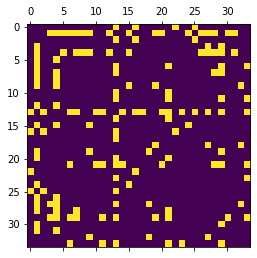

In [26]:
plt.matshow(nx.to_numpy_matrix(graph, nodelist=np.random.permutation(list(graph.nodes()))))
plt.show()

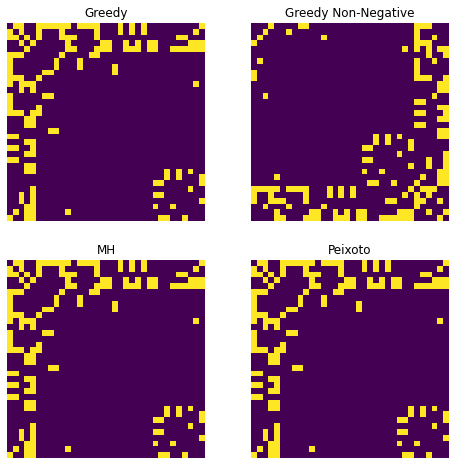

In [27]:
plt.figure(figsize=(8,8))
for i, p in enumerate(models):
    plt.subplot(2,2,i+1)
    plt.imshow(nx.to_numpy_matrix(graph, nodelist=# Your code here ))
    plt.title(labels[i])
    plt.axis('off')
plt.show()    

### Exercise 1.e

* Plot the affinity matrices of two partition at your choice.

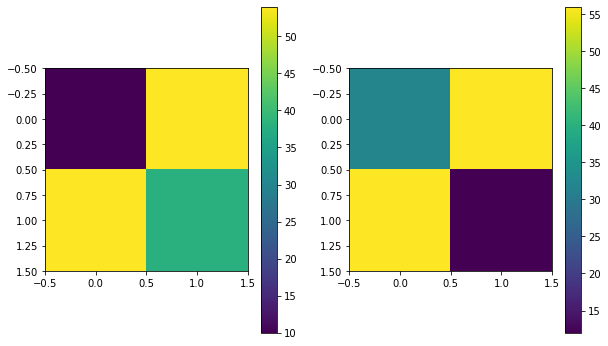

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
im1 = ax1.imshow(# Your code here )
im2 = ax2.imshow(# Your code here )
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
plt.show()

# Exercise 2

### Degree-corrected SBM

As you could notice, the best partition found by the algorithms favor a block division correlated with degree.   The solution to this problem is to incorporate explicitly degree heterogeneity into the model. 

This implies introducing new hidden variables $\theta_{i}\in \mathbb{R}\geq 0$ controlling the expected degree of node $i$.

\begin{eqnarray}
P(\mathbf{A}| \theta)&=& \prod_{i<j} \text{Pois} \,(A_{ij};\theta_{i}\theta_{j}\,C_{q_i q_j} ) \\
&=& \prod_{i<j} \frac{e^{-\theta_{i}\theta_{j}\,C_{q_iq_j}}\, (\theta_{i}\theta_{j}\,C_{q_iq_j})^{A_{ij}}}{A_{ij}!} \quad.
\end{eqnarray}

In [ ]:
degree_corrected_objective_function = # Your code here

### Exercise 2.b

* Run the three previous inference methods, but this time using the degree-corrected likelihood as objective function.

### **Inference 1**: `KarrerInference`

In [ ]:
N_real=10
best_objective=-1000000
best_partition_standard_DC=None
for r in range(N_real):
    # Your code here 

### **Inference 1b**: `KarrerInference` with no negative moves allowed.

In [ ]:
N_real=10
best_objective=-1000000
best_partition_standard_nn_DC=None
for r in range(N_real):
    # Your code here 

### **Inference 2**: `MetropolisHastingInference` 

In [ ]:
N_real=10
best_objective=-1000000
best_partition_standard_MH_DC=None
for r in range(N_real):
    # Your code here 

### **Inference 3**: `PeixotoInference` 

In [ ]:
N_real=10
best_objective=-1000000
best_partition_standard_Peixoto_DC=None
for r in range(N_real):
    # Your code here 

#### Plots the results

In [ ]:
models_DC = [best_partition_standard_DC, best_partition_standard_nn_DC, best_partition_standard_MH_DC, best_partition_standard_Peixoto_DC]
plt.figure(figsize=(16,10))
for i, p in enumerate(models_DC):
    # Your code here 
plt.show()

#### Plots the adjacency matrix ordered by blocks.

In [ ]:
plt.figure(figsize=(8,8))
for i, p in enumerate(models_DC):
    # Your code here 
plt.show()

#### Plots the affinity matrices of two partition at your choice.

In [ ]:
# Your code here 